In [1]:
import glob
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
csv_files = glob.glob("../src/simulations/*.csv*")
len(csv_files)

110

In [3]:
#regex = re.compile(r'sim_.*(?:Schweinsberg|Poisson).*\.csv$')
regex = re.compile(r'sim_.*(?:Schweinsberg).*\.csv$')

sim_files = [file for file in csv_files if regex.search(file)]
len(sim_files)

55

In [4]:
df_list = []

for file in sim_files:
    df = pd.read_csv(file)
    df_list.append(df)

data = pd.concat(df_list, ignore_index=True)
data.drop(columns=['selection_period','selection_type', 'population_size_model'], inplace=True)
data

,N_simulations,fixation_probability,lost_probability,parameter,population_size,selection_coefficient
0,500000,0.999568,0.000432,1.7,1000,-0.001
1,500000,0.000988,0.999012,1.5,1000,0.010
2,500000,0.021762,0.978238,2.0,1000,0.100
3,500000,0.000902,0.999098,1.2,1000,0.005
4,500000,0.000702,0.999298,1.7,1000,0.005
5,500000,0.998638,0.001362,1.0,1000,-0.050
6,500000,0.000726,0.999274,1.5,1000,0.001
7,500000,0.975286,0.024714,2.0,1000,-0.100
8,500000,0.999398,0.000602,2.0,1000,-0.005
9,500000,0.008578,0.991422,2.0,1000,0.050


In [5]:
data = data.sort_values(by=['parameter','selection_coefficient'], ascending=[False,False])
data = data[data['N_simulations'] == 500000]
data = data.reset_index(drop=True)
data

,N_simulations,fixation_probability,lost_probability,parameter,population_size,selection_coefficient
0,500000,0.021762,0.978238,2.0,1000,0.100
1,500000,0.008578,0.991422,2.0,1000,0.050
2,500000,0.001142,0.998858,2.0,1000,0.010
3,500000,0.000666,0.999334,2.0,1000,0.005
4,500000,0.000294,0.999706,2.0,1000,0.001
5,500000,0.999796,0.000204,2.0,1000,0.000
6,500000,0.999714,0.000286,2.0,1000,-0.001
7,500000,0.999398,0.000602,2.0,1000,-0.005
8,500000,0.998788,0.001212,2.0,1000,-0.010
9,500000,0.990678,0.009322,2.0,1000,-0.050


In [6]:
#data = data[data['N_simulations'] == 250000]
data = data[data['N_simulations'] == 500000]
data['NeS'] = data['selection_coefficient'] * data['population_size']
#data = data[data['NeS'] >= 0]
data = data.reset_index(drop=True)
data

,N_simulations,fixation_probability,lost_probability,parameter,population_size,selection_coefficient,NeS
0,500000,0.021762,0.978238,2.0,1000,0.100,100.0
1,500000,0.008578,0.991422,2.0,1000,0.050,50.0
2,500000,0.001142,0.998858,2.0,1000,0.010,10.0
3,500000,0.000666,0.999334,2.0,1000,0.005,5.0
4,500000,0.000294,0.999706,2.0,1000,0.001,1.0
5,500000,0.999796,0.000204,2.0,1000,0.000,0.0
6,500000,0.999714,0.000286,2.0,1000,-0.001,-1.0
7,500000,0.999398,0.000602,2.0,1000,-0.005,-5.0
8,500000,0.998788,0.001212,2.0,1000,-0.010,-10.0
9,500000,0.990678,0.009322,2.0,1000,-0.050,-50.0


In [7]:
data[data["selection_coefficient"] == 0]

,N_simulations,fixation_probability,lost_probability,parameter,population_size,selection_coefficient,NeS
5,500000,0.999796,0.000204,2.0,1000,0.0,0.0
16,500000,0.999556,0.000444,1.7,1000,0.0,0.0
27,500000,0.999428,0.000572,1.5,1000,0.0,0.0
38,500000,0.999146,0.000854,1.2,1000,0.0,0.0
49,500000,0.999022,0.000978,1.0,1000,0.0,0.0


In [8]:
idx = data[data["selection_coefficient"] == 0].index
print(idx)
lost = data.loc[idx,'lost_probability']
fix = data.loc[idx,'fixation_probability']
#data.loc[idx, 'fixation_probability'] = lost
#data.loc[idx, 'lost_probability'] = fix

Int64Index([5, 16, 27, 38, 49], dtype='int64')


In [9]:
data[data["selection_coefficient"] == 0]

,N_simulations,fixation_probability,lost_probability,parameter,population_size,selection_coefficient,NeS
5,500000,0.999796,0.000204,2.0,1000,0.0,0.0
16,500000,0.999556,0.000444,1.7,1000,0.0,0.0
27,500000,0.999428,0.000572,1.5,1000,0.0,0.0
38,500000,0.999146,0.000854,1.2,1000,0.0,0.0
49,500000,0.999022,0.000978,1.0,1000,0.0,0.0


parameter: 1.0
ds =  [0.999022]
parameter: 1.2
ds =  [0.999146]
parameter: 1.5
ds =  [0.999428]
parameter: 1.7
ds =  [0.999556]
parameter: 2.0
ds =  [0.999796]


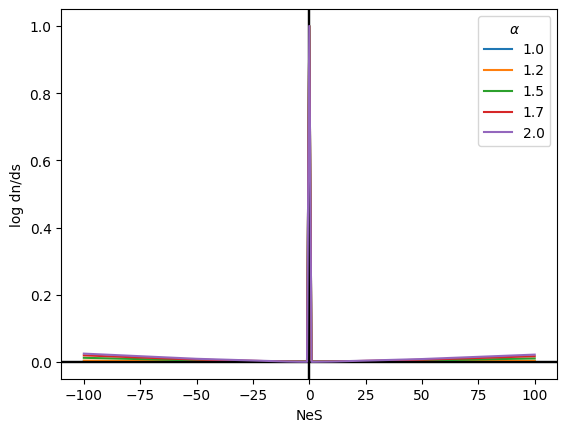

In [15]:
groups = data.groupby('parameter')
final_data = []
for name, group in groups:
        
    ds = group.loc[group['selection_coefficient'] == 0, 'fixation_probability'].values
    print('parameter:', name)
    print('ds = ', ds)
    group['dn/ds'] = np.where(group['NeS'] < 0, 
                              group['lost_probability'] / ds, #in order to divide by p_lost under N-1 initial
                              group['fixation_probability'] / ds)
    group['log dn/ds'] = np.log(group['dn/ds'])

    plt.axvline(x=0, color='black')
    plt.axhline(y=0, color='black')
    plt.plot(group['NeS'], group['dn/ds'], label=name)
    #plt.xscale('log')
    plt.ylabel('log dn/ds')
    plt.xlabel('NeS')
    plt.legend(title=r'$\alpha$')
  
    
    #plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda val, _: f'{int(val)}' if val >= 1 else 'neutral'))

    final_data.append(group)

In [13]:
final_data = pd.concat(final_data)
final_data

,N_simulations,fixation_probability,lost_probability,parameter,population_size,selection_coefficient,NeS,dn/ds,log dn/ds
44,500000,0.001830,0.998170,1.0,1000,0.100,100.0,0.001832,-6.302461
45,500000,0.001304,0.998696,1.0,1000,0.050,50.0,0.001305,-6.641340
46,500000,0.001020,0.998980,1.0,1000,0.010,10.0,0.001021,-6.886974
47,500000,0.001040,0.998960,1.0,1000,0.005,5.0,0.001041,-6.867556
48,500000,0.000886,0.999114,1.0,1000,0.001,1.0,0.000887,-7.027815
49,500000,0.999022,0.000978,1.0,1000,0.000,0.0,1.000000,0.000000
50,500000,0.999128,0.000872,1.0,1000,-0.001,-1.0,0.000873,-7.043743
51,500000,0.998968,0.001032,1.0,1000,-0.005,-5.0,0.001033,-6.875278
52,500000,0.998990,0.001010,1.0,1000,-0.010,-10.0,0.001011,-6.896826
53,500000,0.998638,0.001362,1.0,1000,-0.050,-50.0,0.001363,-6.597823
